# **Importing Libraries**

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


# **Reading Data**

In [3]:
a=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Etlhive/Deep Learning/Text Processing/Restaurant_Reviews.tsv",sep="\t")

In [4]:
a.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# **Importing Libraries to Eliminate STOPWORDS**

In [5]:
import nltk
nltk.download("stopwords")
nltk.download("omw-1.4")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# **Function for Text Normalization**

1. Eliminating Special Characters
2. Converting words to lowercase
3. Eliminating STOPWORDS
4. Stemming
5. Lemmatization

In [6]:
def prep_txt(w):
  import re
  q = re.sub("[^a-zA-Z0-9 ]","",w)
  q = q.lower()
  q = q.split(" ")
  from nltk.corpus import stopwords
  sw = stopwords.words("english")
  from nltk.stem import PorterStemmer,WordNetLemmatizer
  ps = PorterStemmer()
  wnl = WordNetLemmatizer()
  r = ""
  for i in q:
    if(i not in sw) and (i!=""):
      t = wnl.lemmatize(i)
      t = ps.stem(t)
      r = r + " " + t
  return r

# **Text Normalization**

In [7]:
Q=[]
for i in a.Review:
  Q.append(prep_txt(i))

In [8]:
Q

[' wow love place',
 ' crust good',
 ' tasti textur nasti',
 ' stop late may bank holiday rick steve recommend love',
 ' select menu great price',
 ' get angri want damn pho',
 ' honeslti didnt tast fresh',
 ' potato like rubber could tell made ahead time kept warmer',
 ' fri great',
 ' great touch',
 ' servic prompt',
 ' would go back',
 ' cashier care ever say still end wayyy overpr',
 ' tri cape cod ravoli chicken cranberrymmmm',
 ' disgust pretti sure human hair',
 ' shock sign indic cash',
 ' highli recommend',
 ' waitress littl slow servic',
 ' place worth time let alon vega',
 ' like',
 ' burritto blah',
 ' food amaz',
 ' servic also cute',
 ' could care le interior beauti',
 ' perform',
 ' that rightth red velvet cakeohhh stuff good',
 ' never brought salad ask',
 ' hole wall great mexican street taco friendli staff',
 ' took hour get food 4 tabl restaur food luke warm sever run around like total overwhelm',
 ' worst salmon sashimi',
 ' also combo like burger fri beer 23 decent

# **Countvectorization, defining X and Y**

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(Q).toarray()
Y=a.Liked

## **Train Test Split**

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

# **Gaussian Naive Bayes Model Creation**

In [11]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [12]:
model=nb.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)

# **Bias and Variance Check**

In [13]:
from sklearn.metrics import accuracy_score
print("Training Accuracy: ",accuracy_score(ytrain,pred_tr))
print("Testing Accuracy: ",accuracy_score(ytest,pred_ts))

Training Accuracy:  0.94
Testing Accuracy:  0.71


**Disadvantage of using GaussianNB algorithm is that we cannot perform Hyperparameter Tuning**

# **Predicting Unseen Data**

In [14]:
#GODD Review
#Great Food!!!! Great Taste, DELICIOUS, Keep the good Work

user_review=input("Enter your review: ")


#Preprocessing
q=prep_txt(user_review)
#Countvectorization
X_test=cv.transform([q]).toarray()

#Prediction
pred_final=model.predict(X_test)
if pred_final[0]==0:
  print("\n\nThe User disliked the service.")
else:
  print("\n\nThe User liked the service.")

Enter your review: Great Food!!!! Great Taste, DELICIOUS, Keep the good Work


The User liked the service.


In [15]:
#BAD Review
#The Taste was bad!!! Horrible. The worst. Never Visting again. The Service was Poor!!! Very disrespectful staff

user_review=input("Enter your review: ")


#Preprocessing
q=prep_txt(user_review)
#Countvectorization
X_test=cv.transform([q]).toarray()

#Prediction
pred_final=model.predict(X_test)
if pred_final[0]==0:
  print("\n\nThe User disliked the service.")
else:
  print("\n\nThe User liked the service.")

Enter your review: The Taste was bad!!! Horrible. The worst. Never Visting again. The Service was Poor!!! Very disrespectful staff


The User disliked the service.


# **Predicting on Unseen Data which has multiple reviews**

In [21]:
B=pd.read_excel("/content/UnseenRestReviews.xlsx")

In [22]:
B

,Review
0,The food quality is very very bad had order so...
1,"Bad food quality, wastage of money, we can get..."
2,Came here for dinner and had a fantastic exper...
3,"The bartender, Erin, couldn’t have been nicer"
4,Never recommending this to anybody.
5,"When my husband asked for some more lemon, a s..."
6,"Oh, and the potato pancakes!"
7,Long waits! Greasy chicken
8,My lunch libre was barely palatable because th...
9,This place is fantastic!


In [23]:
Q=[]
for i in B.Review:
  Q.append(prep_txt(i))
Q

[' food qualiti bad order soup terribl could eat spoon need chang chef earliest servic ambianc okay',
 ' bad food qualiti wastag money get better food hotel servic also good',
 ' came dinner fantast experi',
 ' bartend erin couldnt nicer',
 ' never recommend anybodi',
 ' husband ask lemon surpris waiter point alreadi lemon plate tast salt pepper tabl tri hardest attract someon attent get bit salt took',
 ' oh potato pancak',
 ' long wait greasi chicken',
 ' lunch libr bare palat meat salti could bare eat insid taco',
 ' place fantast']

In [24]:
X_test=cv.transform(Q).toarray()

#Prediction
pred_final=model.predict(X_test)
B["Prediction"]=pred_final
R=[]
for i in B.Prediction:
  if i==0:
    R.append("Disliked")
  else:
    R.append("Liked")
B["Consumer_Review_Pred"]=R

B

,Review,Prediction,Consumer_Review_Pred
0,The food quality is very very bad had order so...,0,Disliked
1,"Bad food quality, wastage of money, we can get...",0,Disliked
2,Came here for dinner and had a fantastic exper...,1,Liked
3,"The bartender, Erin, couldn’t have been nicer",1,Liked
4,Never recommending this to anybody.,1,Liked
5,"When my husband asked for some more lemon, a s...",1,Liked
6,"Oh, and the potato pancakes!",1,Liked
7,Long waits! Greasy chicken,0,Disliked
8,My lunch libre was barely palatable because th...,0,Disliked
9,This place is fantastic!,1,Liked


### **The Model misclassified 2 reviews: Index No. 4 and 5**

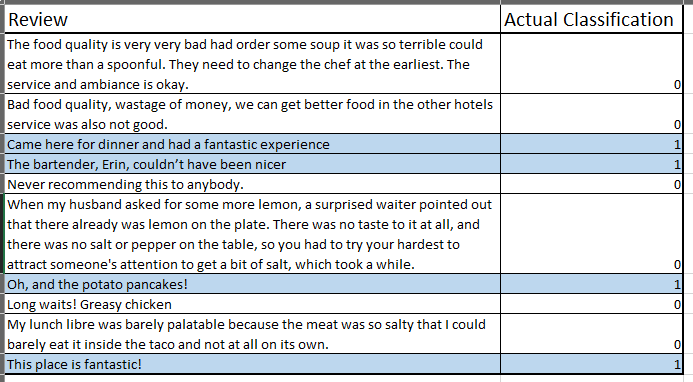

# **END**